# Plot the gene pearson correlations, size represented as degree centrality
### Aim:
Plot the correlations of the largest community with the GOI
Data points scaled by network degree centrality

### Output:
Dot plot of pearson correlations of the largest community

In [1]:
# Import packages and DepMap tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from DepMapTools.DataImport import SaveLoad
from DepMapTools.GeneOntology import OntologyAnalysis
from DepMapTools.Networks import CentralityAnalysis
import os

In [2]:
# Instantiate SaveLoad and OntologyAnalysis class and define directory to save network image
sl = SaveLoad()
oa = OntologyAnalysis()
ca = CentralityAnalysis()
PRD = ".."
dir_name = 'Figures'
data_path = os.path.join(PRD,
                         dir_name
                         )
os.makedirs(data_path,
            exist_ok=True
            )

In [3]:
# Load community dictionary
PRD = ".."
com_path = os.path.join(PRD,
                           '2_Community_Analysis/pickle_files/chronos_k_community_funk.pickle'
                           )
net_path = os.path.join(PRD,
                        '1_SingleGene_Analysis/pickle_files/chronos_singlegene_funk.pickle'
                        )
com_dict = sl.load_dict_pickle(com_path)
net_dict = sl.load_dict_pickle(net_path)

In [4]:
def plot_dot_plot(gene, com_dict, net_dict):
    com = com_dict[gene]['Community']['gene'].tolist()
    net = net_dict[gene]['Network']
    cor = net_dict[gene]['Correlation']
    # Get network community
    to_del = [x for x in net.nodes() if x not in com]
    for x in to_del:
        net.remove_node(x)
    # Calculate centrality
    degree = ca.degree_centrality(net)
    # Make df
    df_deg = pd.DataFrame.from_dict(degree, orient='index', columns=['Degree'])
    t_cor2 = cor[[f'{gene}_Correlations', f'{gene}_Pearson_R']]
    t_cor3 = t_cor2.set_index(f'{gene}_Correlations')
    merged = pd.merge(df_deg, t_cor3, left_index=True, right_index=True).reset_index()
    merged2 = merged.reset_index()
    merged2 = merged2.sort_values(by=f'{gene}_Pearson_R')
    # Plot a scatterplot of the results
    sns.set(rc={'figure.figsize':(15,8)}, style='whitegrid', font_scale=1.4)
    ax = sns.scatterplot(x="index", y=f"{gene}_Pearson_R", data=merged2, palette='viridis_r', hue='Degree', size='Degree', sizes=(300,600))
    ax.set_title(f'\n{gene} Community Gene Correlations\n')
    ax.set(xlabel='\nCommunity Gene', ylabel='\nPearson Corelation Coefficent')
    ax.legend(title='Degree Centrality', title_fontsize=15, fontsize=15, markerscale=0.8)
    handles, labels = ax.get_legend_handles_labels()
    new_labels = [label[:4] for label in labels]
    ax.legend(handles, new_labels)
    ax.tick_params(axis='x', rotation=90)
    sl.save_fig(f'{gene}_com_corr')
    plt.show()

Saving figure INHBE_com_corr_2


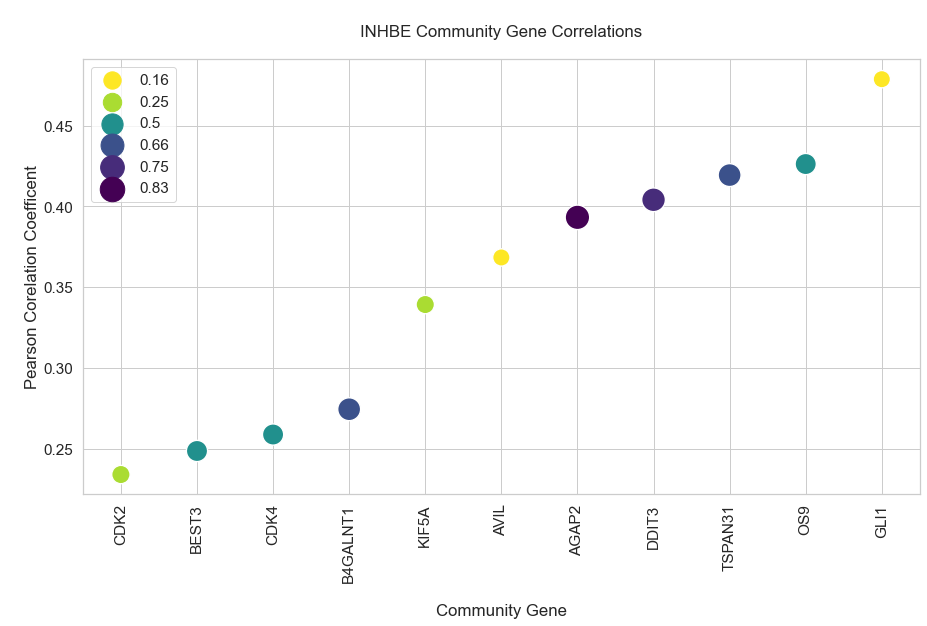

In [6]:
# plot dot plot fot specified gene
gene = 'INHBE'
plot_dot_plot(gene, com_dict, net_dict)